In [22]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave
import IPython.display as ipd
import thinkdsp
from scipy.fftpack import rfft, irfft, fftfreq, fft
import scipy

In [35]:
def resonanceFreqResp(samplingFreq, a, b, wave):
    nFreqs = 1000
    digFreqGrid = 2*np.pi*np.arange(nFreqs)/nFreqs
    freqGrid = digFreqGrid*samplingFreq/(2*np.pi)
    centerFreq = 2*np.pi*((samplingFreq/100)*a)/samplingFreq # make the centerFreq scalable by 0-100% of the samplingFreq
    bandwidth = 2*np.pi*((samplingFreq/100)*b)/samplingFreq # make the bandwidth scalable by 0-100% of the samplingFreq

    nFreqs = np.size(freqGrid)
    poleRadius = (2-bandwidth)/2
    poleAngle = np.arccos(2*poleRadius*np.cos(centerFreq)/(1+poleRadius**2))
        
    gain = (1-poleRadius**2)*np.sin(poleAngle)
    iirCoefficients = np.array([gain*2*poleRadius*np.cos(poleAngle), -poleRadius**2])
    #for i, b in zip(wave, output):
        #print(i)
        #print(b)
    freqResp = gain/(1-2*poleRadius*np.cos(poleAngle)*np.exp(-1j*freqGrid)+poleRadius**2*np.exp(-1j*2*freqGrid))
    
    return freqResp, iirCoefficients

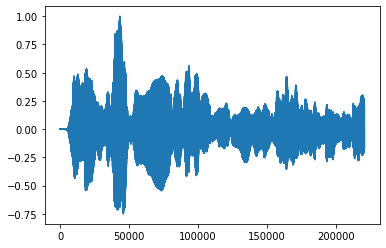

In [36]:
original_samples = 1 * np.sin(2*np.pi*440*np.arange(0,88200).T/44100)
wave = thinkdsp.read_wave("92002__jcveliz__violin-origional.wav")
# compute the frequency response

samplingFreq = 44100;
a = 50 # slider input for centerfreq
b = 20 # slider input for bandwidth
plt.plot(wave.ys.real)
freqResp, out = resonanceFreqResp(samplingFreq, a, b, wave.ys.real)
new = np.convolve(wave.ys.real, freqResp)
ampResp = np.abs(freqResp[0])
phaseResp = np.angle(freqResp[0])
#ipd.Audio(freqResp[0], rate=samplingFreq)
#ipd.Audio(freqResp[1], rate=samplingFreq)
ipd.Audio(wave.ys.real, rate=44100)

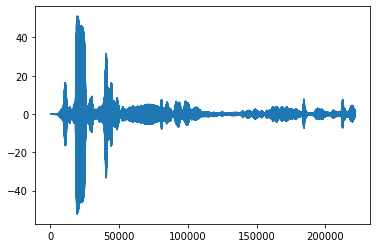

In [37]:
plt.plot(new.real)
ipd.Audio(new.real, rate=44100)

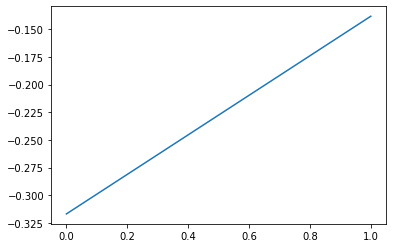

In [34]:
plt.plot(out)